Mount The Required Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import all the necessary libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from wordcloud import WordCloud, STOPWORDS


from joblib import dump,load
#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import random
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor

Read CSV File

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Restaurant Rating Prediction/zomato.csv",nrows=20000)

Overview of Data

In [ ]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,https://www.zomato.com/bangalore/mudpipe-cafe-...,"1, KDP Building, 4th Floor, Near Forum Mall, A...",Mudpipe Cafe,Yes,Yes,4.5/5,1878,+91 9631220007,BTM,Cafe,"Chaat, Nachos, Peri Peri Pizza, Wedges, Milk S...","Cafe, Continental, Burger",900,"[('Rated 4.0', 'RATED\n Amazing ambience. Goo...","['Crispy Spinach Corn Cheese Stick', 'Alfredo ...",Delivery,Jayanagar
19996,https://www.zomato.com/bangalore/alif-restaura...,"312, 15th cross, 5th Phase, JP Nagar, Bangalore",Alif Restaurant,Yes,No,3.6/5,27,+91 8667307119,JP Nagar,Casual Dining,NaN,"North Indian, Chinese",600,"[('Rated 3.0', ""RATED\n It's a medium size ho...","['Pepper Chicken', 'Grilled Chicken', 'Dum Bri...",Delivery,Jayanagar
19997,https://www.zomato.com/bangalore/black-deer-ko...,"18th Main Park, 17th H Main Road, Koramangala ...",Black Deer,Yes,No,4.4/5,149,080 43751110\r\n+91 9886552002,Koramangala 5th Block,"Takeaway, Delivery","Chocolate Fudge, Chocolate Shake, Bubble Gum S...","Beverages, Desserts",350,"[('Rated 4.0', ""RATED\n I'm not a big fan of ...","['Red Velvet Ice Cream Sundaes', 'Fruit Basket...",Delivery,Jayanagar
19998,https://www.zomato.com/bangalore/supreme-birya...,Delivery Only,Supreme Biryani,Yes,No,NaN,0,+91 9606441698,South Bangalore,"Takeaway, Delivery",NaN,Biryani,400,[],"['Masaledar Egg Biryani [Serves 2]', 'Biryani ...",Delivery,Jayanagar


All Column information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          20000 non-null  object
 1   address                      20000 non-null  object
 2   name                         20000 non-null  object
 3   online_order                 20000 non-null  object
 4   book_table                   20000 non-null  object
 5   rate                         17129 non-null  object
 6   votes                        20000 non-null  int64 
 7   phone                        19595 non-null  object
 8   location                     19996 non-null  object
 9   rest_type                    19916 non-null  object
 10  dish_liked                   9099 non-null   object
 11  cuisines                     19987 non-null  object
 12  approx_cost(for two people)  19934 non-null  object
 13  reviews_list                 20

In [ ]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            2871
votes                              0
phone                            405
location                           4
rest_type                         84
dish_liked                     10901
cuisines                          13
approx_cost(for two people)       66
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

rate , phone , location , rest_type , dish_liked , cuisines, approx_cost(for two people) have missing values

In [ ]:
df['votes'].describe()

count    20000.000000
mean       268.516550
std        749.398815
min          0.000000
25%          6.000000
50%         41.000000
75%        193.000000
max      16345.000000
Name: votes, dtype: float64

In [ ]:
# drop unnecessary columns
column_to_drop = ['address','url' ,'listed_in(city)', 'phone']
df.drop(columns=column_to_drop, axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         20000 non-null  object
 1   online_order                 20000 non-null  object
 2   book_table                   20000 non-null  object
 3   rate                         17129 non-null  object
 4   votes                        20000 non-null  int64 
 5   location                     19996 non-null  object
 6   rest_type                    19916 non-null  object
 7   dish_liked                   9099 non-null   object
 8   cuisines                     19987 non-null  object
 9   approx_cost(for two people)  19934 non-null  object
 10  reviews_list                 20000 non-null  object
 11  menu_item                    20000 non-null  object
 12  listed_in(type)              20000 non-null  object
dtypes: int64(1), object(12)
memory 

###  2.2.2 Remove Duplicates

In [ ]:
# check for duplicate values
print("No of Duplicates in dataset:  ",df.duplicated().sum())

No of Duplicates in dataset:   2242


In [ ]:
# drop the duplicates
df.drop_duplicates(inplace=True)

### 2.2.3 Removing Null values
Q.2) Is there NULL values present in dataset? If yes then many they are (in %)?

In [ ]:
# check for null values
((df.isna().sum()/df.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           13.14
votes                           0.00
location                        0.02
rest_type                       0.44
dish_liked                     52.18
cuisines                        0.07
approx_cost(for two people)     0.32
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
dtype: float64

#### Observation:
- We can oberve that 52% dish_liked is missing as well as 15% rate values are missing.
- If we throw everything out, mean we are loosing more than 60% points.



In [ ]:
# check for unique values in the rate column
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5'], dtype=object)

#### Observation:
- There are some points which has 'NEW' rating and '-' rating, which is completely incorrect.

In [ ]:
# removed 'NEW' and '-' from rate coloumn and put NaN value.
df['rate'] = df['rate'].replace('NEW',np.NaN)
df['rate'] = df['rate'].replace('-',np.NaN)

In [ ]:
# chcek again data.rate coloumn. we can see nan values.
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5'], dtype=object)

We can see that by default it has '/5' (divide by 5) arithmatic character, first we will remove this then proceed.

In [ ]:
((df.isna().sum()/df.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           18.63
votes                           0.00
location                        0.02
rest_type                       0.44
dish_liked                     52.18
cuisines                        0.07
approx_cost(for two people)     0.32
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
dtype: float64

Note : 'rate' NaN % was 10.15 initially now it is 14.11. Because some values took 'NEW' and '-' values which we removed and this is actual NaN % for rate coloumn.

In [ ]:
## apply takes a function and applies it to all values of pandas series.

df['rate'] = df['rate'].astype(str)

## removed all '/5' and replace with ''
df['rate'] = df['rate'].apply(lambda r: r.replace('/5',''))

## convert rate to float
df['rate'] = df['rate'].apply(lambda r: float(r))

In [ ]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
19994    3.9
19995    4.5
19996    3.6
19997    4.4
19998    NaN
Name: rate, Length: 17758, dtype: float64

***As we understood Rate colomn above, lets understand, dish_liked***<br>
But before that first go throght "Review_List"

In [ ]:
type(df.reviews_list[0])

str

In [ ]:
# https://stackoverflow.com/questions/15197673/using-pythons-eval-vs-ast-literal-eval
## ast.literal_eval raises an exception if the input isn't a valid Python datatype, so the code won't be executed if it's not.

# return to a list of tuples
df.reviews_list = df.reviews_list.apply(lambda x: ast.literal_eval(x))
type(df.reviews_list[0])

list

In [ ]:
# check for the first item in list
df.reviews_list[0][0]

('Rated 4.0',
 'RATED\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.')

In [ ]:
# check for the second item in list
df.reviews_list[0][1]

('Rated 4.0',
 'RATED\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\nCheers')

#### Observation:
- We can see that in "Review_List" starting line come up with rating. 'Rated 4.0'.
- We can use this values and filled up 'Rate' colomn.

**Q3A. Can we use this values as fill up in 'Rate' Colomn wherever it is missing? If yes then image we have saved that data point,ie information.**

In [ ]:
# extract the rate for the first input from the review column
extracted = [float(i[0].replace('Rated','').strip()) for i in df.reviews_list[0]]
extracted

[4.0, 4.0, 2.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0]

Above are review for particular restaurant, we can use mean value.

In [ ]:
extracted_mean = round((sum(extracted)/len(extracted)),1)
extracted_mean

4.1

- This is great. Lets Compare this value with 'Rate' colomn value.

In [ ]:
print("Extracted Rate: ",extracted_mean)
print("Original Rate: ",df.rate[0])

Extracted Rate:  4.1
Original Rate:  4.1


This is brillliant, lets do for all.

In [ ]:
def extract_features_from_review_list(x):
    '''
    extract the rate value out of a string inside tuple
    '''
    # ensure that x is not Null and there is more than one rate
    if not x or len(x) <= 1:
        return None
    
    ## checked give values is text or not, if it is text then removed 'Rated', convert string to float.
    rate = [float(i[0].replace('Rated','').strip())  for i in x if type(i[0])== str]
    
    ## return average value
    return round((sum(rate)/len(rate)),1)

In [ ]:
# create new column
df['review_rate']  = df.reviews_list.apply(lambda x : extract_features_from_review_list(x))

In [ ]:
## Compare "Original Rate" vs "Rate extracted from Review List"
df.loc[:,['rate','review_rate']].sample(10,random_state=1)

,rate,review_rate
2920,3.9,3.4
10760,3.5,4.9
3314,2.7,4.0
2012,3.2,3.2
17538,4.3,4.4
1248,3.3,3.2
16647,4.0,4.0
8674,NaN,NaN
15693,3.3,3.3
13451,4.0,4.7


- Quite Closer.
- Ok, so we can replace missing value with this new adjustment.

In [ ]:
# get the before number of null values
df.rate.isna().sum()

3308

In [ ]:
## https://stackoverflow.com/questions/26535563/querying-for-nan-and-other-names-in-pandas

## finding rate = NaN and review_rate == not NaN
df.query('rate != rate & review_rate == review_rate')[:5]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),review_rate
72,Spicy Tandoor,No,No,NaN,0,Banashankari,Quick Bites,NaN,North Indian,150,"[(Rated 4.0, RATED\n cost for chicken rolls i...",[],Delivery,4.5
90,Me And My Cake,No,No,NaN,0,Banashankari,Delivery,NaN,"Bakery, Desserts",500,"[(Rated 1.0, RATED\n Do not order anything. T...",[],Delivery,1.0
110,Hari Super Sandwich,No,No,NaN,0,Banashankari,"Takeaway, Delivery",NaN,"Sandwich, Pizza, Beverages",200,"[(Rated 1.0, RATED\n I have been here many ti...",[],Delivery,1.0
116,Wood Stove,No,No,NaN,0,Banashankari,"Takeaway, Delivery",NaN,South Indian,150,"[(Rated 5.0, RATED\n Wow this food is great ?...",[],Delivery,5.0
138,Sri Murari Family Restaurant,No,No,NaN,0,Banashankari,Quick Bites,NaN,Biryani,250,"[(Rated 4.0, RATED\n This tiny mess near kath...",[],Delivery,4.5


In [ ]:
# https://stackoverflow.com/questions/26535563/querying-for-nan-and-other-names-in-pandas
# https://stackoverflow.com/questions/24036911/how-to-update-values-in-a-specific-row-in-a-python-pandas-dataframe


## finding index where rate==NaN and review_rate== not NaN
nan_index = df.query('rate != rate & review_rate == review_rate').index
for i in nan_index:
    df.loc[i,'rate'] = df.loc[i,'review_rate'] 

In [ ]:
# update the number of null values now
df.rate.isna().sum()

2759

Please notice we have saved more than 1000 points.

In [ ]:
# check now
((df.isna().sum()/df.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           15.54
votes                           0.00
location                        0.02
rest_type                       0.44
dish_liked                     52.18
cuisines                        0.07
approx_cost(for two people)     0.32
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
review_rate                    29.61
dtype: float64

Purpose behind filling missing values has being accomplished, we can remove 'review_rate' colomn

In [ ]:
# # first let's drop the review_rate column now
df.drop(columns='review_rate',axis=1,inplace=True)

In [ ]:
df.rate.isna().sum()

2759

Now we will remove missing values, from 'rate' and 'average_cost' colomn

In [ ]:
# drop null values
df.dropna(subset=['rate', 'approx_cost(for two people)'],inplace=True)

In [ ]:
# check shape
df.shape

(14952, 13)

In [ ]:
df.isna().sum()

name                              0
online_order                      0
book_table                        0
rate                              0
votes                             0
location                          0
rest_type                        57
dish_liked                     6501
cuisines                          2
approx_cost(for two people)       0
reviews_list                      0
menu_item                         0
listed_in(type)                   0
dtype: int64

In [ ]:
# remove cuisines missing values
df=df[df.cuisines.isna()==False]

In [ ]:
## rename 'approx_cost(for two people)' to 'average_cost'
df.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

In [ ]:
# check for percentage of null values 
((df.isna().sum()/df.shape[0])*100).round(2)

name                0.00
online_order        0.00
book_table          0.00
rate                0.00
votes               0.00
location            0.00
rest_type           0.38
dish_liked         43.47
cuisines            0.00
average_cost        0.00
reviews_list        0.00
menu_item           0.00
listed_in(type)     0.00
dtype: float64

In [ ]:
# https://stackoverflow.com/questions/51552554/not-working-if-else-in-one-line-python

# make lower case
df.dish_liked = df.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [ ]:
df.dish_liked[:2]

0    pasta, lunch buffet, masala papad, paneer laja...
1    momos, lunch buffet, chocolate nirvana, thai g...
Name: dish_liked, dtype: object

In [ ]:
menu_list = []

# collect the dishes' names and make a menu list for all kind of dishes
for dish in df.dish_liked.tolist():
    if isinstance(dish,str) and len(dish)>0:
        for e in dish.split(','):
            menu_list.append(e)
len(menu_list)

46098

In [ ]:
# Now collect the unique dish name 
menu_set = set(menu_list)

As we replace review_rate into missing rate values can we do the same here.

Q.3B) Can we replace missing 'dish_liked' with 'menu_list' values?

Before we moving further review lists containts different character we first need to encode to UTF-8 then decode to ASCII code. Below is blog to basically understand UTF-8 and ASCII.





Q.3B) Can we replace missing 'dish_liked' with 'menu_list' values?

Before we moving further review lists containts different character we first need to encode to UTF-8 then decode to ASCII code. Below is blog to basically understand UTF-8 and ASCII.

In [ ]:
# https://stackoverflow.com/questions/2365411/convert-unicode-to-ascii-without-errors-in-python        
# https://stackoverflow.com/questions/12053107/test-a-string-if-its-unicode-which-utf-standard-is-and-get-its-length-in-bytes
# https://stackoverflow.com/questions/48006240/how-to-convert-unicode-string-into-normal-text-in-python
# https://stackoverflow.com/questions/4987327/how-do-i-check-if-a-string-is-unicode-or-ascii
#As we replace review_rate into missing rate values can we do the same here.
#Q.3B) Can we replace missing 'dish_liked' with 'menu_list' values?

#Before we moving further review lists containts different character we first need to encode to UTF-8 then decode to ASCII code. Below is blog to basically understand UTF-8 and ASCII.
def clear_text(t):
  return ' '.join([i[1] for i in t]).encode('utf8').decode('ascii',errors='replace')
    

In [ ]:
df['process_text'] = df.reviews_list.apply(lambda x: clear_text(x))

In [ ]:
df['process_text']

0        RATED\n  A beautiful place to dine in.The inte...
1        RATED\n  Had been here for dinner with family....
2        RATED\n  Ambience is not that good enough and ...
3        RATED\n  Great food and proper Karnataka style...
4        RATED\n  Very good restaurant in neighbourhood...
                               ...                        
19993    RATED\n  paneer Manchurian had 6 pieces of pan...
19994    RATED\n  It's been 4 years we have been visiti...
19995    RATED\n  Amazing ambience. Good place to spend...
19996    RATED\n  It's a medium size hotel. We ordered ...
19997    RATED\n  I'm not a big fan of extra sweets sha...
Name: process_text, Length: 14950, dtype: object

We can see that we need to cleanup text because it content different characters "\n : " . This kind of characters are present in text, we need to clean up those characters.

In [ ]:
# here we removed all above mentioned characters

df['process_text'] = df.process_text.apply(lambda x : x.replace("RATED\n  ",'').replace('?','').replace('�','').replace('\n','').replace('.',' ').strip().lower())

In [ ]:
# check part of reviews text for the first restaurant
df.process_text[0]

'a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha  food was fresh and good, service is good too  good for family hangout cheers its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  anyways we ordered ala carte items which took ages to come  

If we try to read this review we can we can come to conclusion this text is enough to give restaurant rating. Also in this review some customer provide dishes name which they loved.

Eg: "lemon chicken", "chilli paratha food was fresh", "palak methi curry is a good" , "masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha food was fresh".

So we can use this values and try to fill missing 'dish_liked' values.


Clean up dist_like

convert text to lower case.
missing value could extract from review_list

In [ ]:
df.dish_liked.nunique()

3360

In [ ]:
# make lower case
df.dish_liked = df.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [ ]:
# example
df.dish_liked[10000]

nan

In [ ]:
# As we discussed above here we are using 'menu_set' and 'process_text' data. Put it into liked dishes list.
menu_set.intersection(df.process_text[10000].split(' '))

{'chicken', 'fish', 'rice', 'thali'}

In [ ]:
#creat a new column for the reviewed dish
df['dish_n_review'] = df.process_text.apply(lambda x: ', '.join(list(menu_set.intersection(x.split(' ')))))

In [ ]:
# https://stackoverflow.com/questions/26535563/querying-for-nan-and-other-names-in-pandas

# get sample to compare
df.query('dish_liked != dish_liked')[['dish_liked','dish_n_review']].sample(5,random_state=1)

,dish_liked,dish_n_review
10323,NaN,"cheesecake, sandwiches, breads"
18326,NaN,
9481,NaN,"rice, roti, chicken, salads, biryani, thali, l..."
3975,NaN,
10289,NaN,rasgulla


So now, we can replace this missed values from the dish_n_review

In [ ]:
# fill in the missing values in dish_liked column with data from reviews
nan_index = df.query('dish_liked != dish_liked & dish_n_review == dish_n_review').index
for i in nan_index:
    df.loc[i,'dish_liked'] = df.loc[i,'dish_n_review']

In [ ]:
# Now let's test our work
df.dish_liked[10000]

'chicken, thali, fish, rice'

Now we can drop the menu_list & menu_set

In [ ]:
del menu_list
del menu_set

In [ ]:
# first let's drop the review_rate column now
df.drop(columns=['dish_n_review'],axis=1,inplace=True)

In [ ]:
# check for null values
((df.isna().sum()/df.shape[0])*100).round(3)

name               0.000
online_order       0.000
book_table         0.000
rate               0.000
votes              0.000
location           0.000
rest_type          0.381
dish_liked         0.000
cuisines           0.000
average_cost       0.000
reviews_list       0.000
menu_item          0.000
listed_in(type)    0.000
process_text       0.000
dtype: float64

In [ ]:
df.shape

(14950, 14)

Now thing looked quite good. There is no missing values.

2.1.2 Data Visualizations¶
Q.4) What is distrubution of 'Rate column'?

Now it is fine, now we can proceed.

Mean is :  3.695832775919759


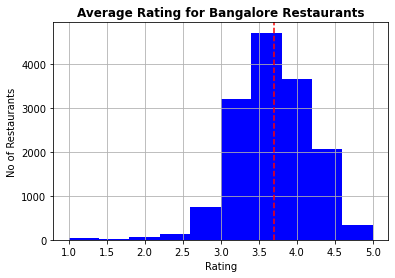

In [ ]:
df.rate.hist(color='blue')
plt.axvline(x= df.rate.mean(),ls='--',color='red')
plt.title('Average Rating for Bangalore Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print("Mean is : ",df.rate.mean())

Observation:
Average rating is 3.7 in banglore for zomato.


Q.5) Which are the top 20 restaurant in the Banglore? What is their count

In [ ]:
df.name.value_counts().head()

Cafe Coffee Day      36
Onesta               33
Five Star Chicken    30
Just Bake            29
Empire Restaurant    28
Name: name, dtype: int64

Text(0.5, 1.0, 'Name Vs Number of Restaurants')

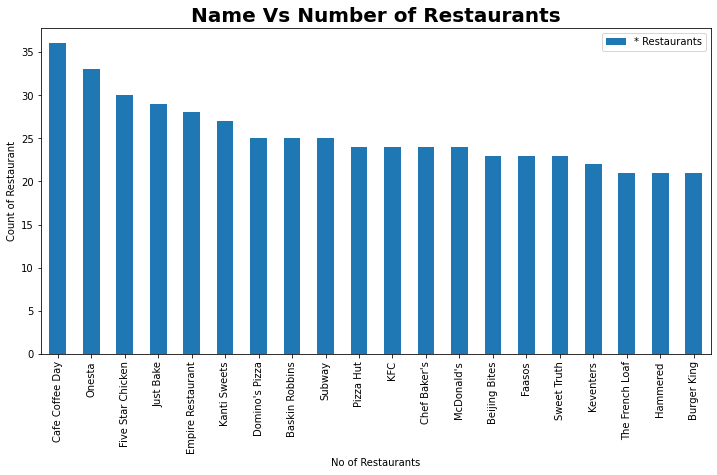

In [ ]:
plt.figure(figsize=(12,6))
ax =df.name.value_counts()[:20].plot(kind='bar')
ax.legend(['* Restaurants'])
plt.xlabel('No of Restaurants')
plt.ylabel('Count of Restaurant')
plt.title("Name Vs Number of Restaurants", fontsize=20, weight='bold')

Observation¶
we can say that 'Cafe Coffee Day' day has highest count among all

Q.6) How many Restaurant accepting online orders?

Yes    10248
No      4702
Name: online_order, dtype: int64

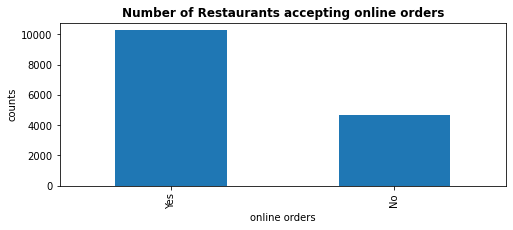

In [ ]:
plt.figure(figsize=(8,3))
ax =df.online_order.value_counts().plot(kind='bar')
plt.title('Number of Restaurants accepting online orders', weight='bold')
plt.xlabel('online orders')
plt.ylabel('counts')

df.online_order.value_counts()

Observation:
Most of order are onlines.

no missing values in online order colomn

Q.7) How many Restaurant have option to book a table?

No     12651
Yes     2299
Name: book_table, dtype: int64

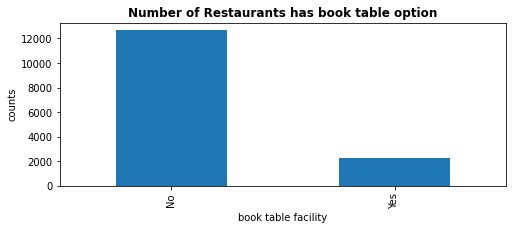

In [ ]:
plt.figure(figsize=(8,3))
ax =df.book_table.value_counts().plot(kind='bar')
plt.title('Number of Restaurants has book table option', weight='bold')
plt.xlabel('book table facility')
plt.ylabel('counts')

df.book_table.value_counts()

Observation
Most of restaurant do not have book table facility

Q.8) In banglore city,in which area has maximum number of restaurants? Also find percetage for the same.

Text(0.5, 1.0, 'Location')

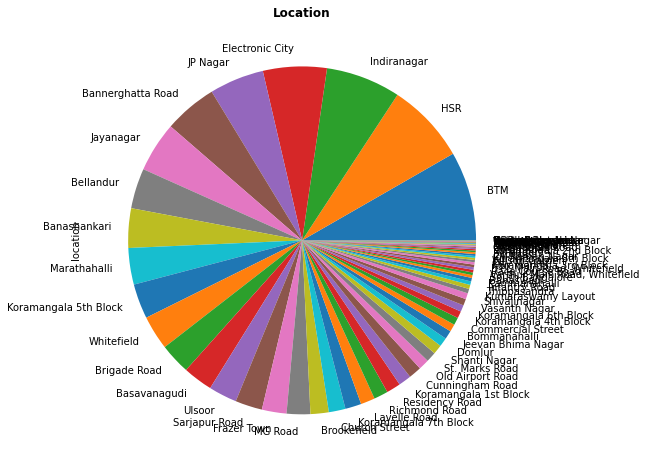

In [ ]:
plt.figure(figsize=(8,8))
ax =df.location.value_counts().plot(kind='pie')
plt.title('Location', weight='bold')

Its very complicated to understand so we will limit ourself to TOP 10 locations

Text(0.5, 1.0, 'Location')

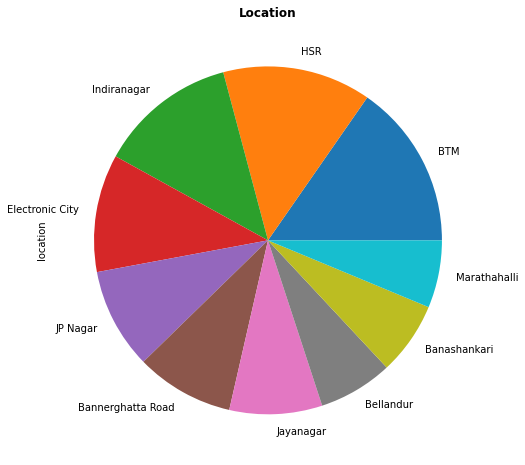

In [ ]:
plt.figure(figsize=(8,8))
ax =df.location.value_counts()[:10].plot(kind='pie')
plt.title('Location', weight='bold')

Observation
We can say that BTM location, where most of restaurant are available

Q9.1) Percentage.


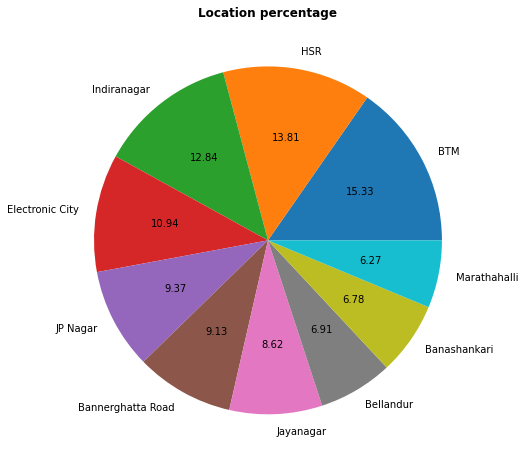

In [ ]:
## https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct

plt.figure(figsize=(8,8))
values = df.location.value_counts()[:10]
labels = df['location'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Location percentage', weight='bold')
plt.show()

Observation:
Now picture seems very clear, maximum restaurant are in BTM follows by HSR,Koramangla, JP Nagar, .. so on.

Q9.2 Now, we know percentage of top 10 area, lets find count of each area.

Text(0, 0.5, 'counts')

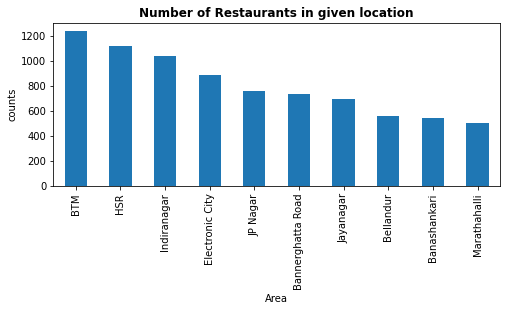

In [ ]:
plt.figure(figsize=(8,3))
ax =df.location.value_counts()[:10].plot(kind='bar')
plt.title('Number of Restaurants in given location', weight='bold')
plt.xlabel('Area')
plt.ylabel('counts')

Observation
BTM area has around 12k restaurants.

In [ ]:
df['location'].nunique() ## Neighbourhoods in banglore 

74

Q.10) What type of restaurant are there in banglore? also percetage and counts

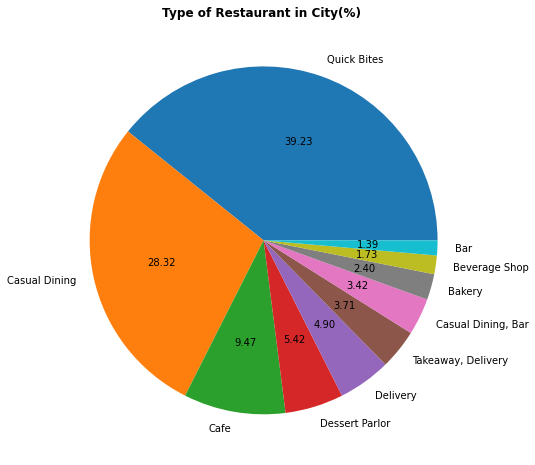

In [ ]:
plt.figure(figsize=(8,8))
values = df.rest_type.value_counts()[:10]
labels = df['rest_type'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Type of Restaurant in City(%) ', weight='bold')
plt.show()

Text(0, 0.5, 'counts')

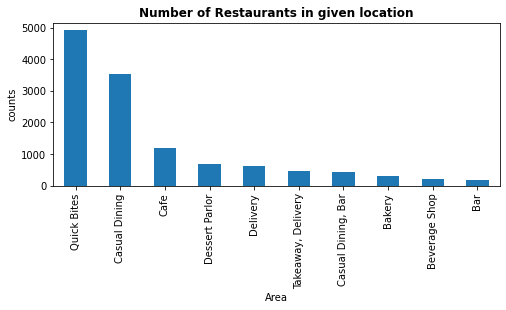

In [ ]:
plt.figure(figsize=(8,3))
ax =df.rest_type.value_counts()[:10].plot(kind='bar')
plt.title('Number of Restaurants in given location', weight='bold')
plt.xlabel('Area')
plt.ylabel('counts')

Observation
"Quick beats" is leading in the race, which is close to 5k follow by "Causal Dining" which is around 3.5K

Q.11) What is the Average cost in restaurants?

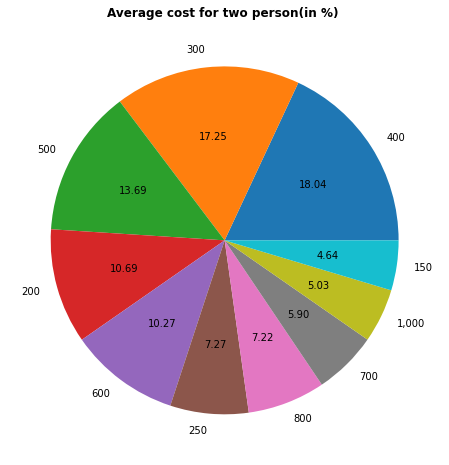

In [ ]:
plt.figure(figsize=(8,8))
values = df.average_cost.value_counts()[:10]
labels = df['average_cost'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Average cost for two person(in %) ', weight='bold')
plt.show()

Observation
There is 17.25% percetage chances that for two person average cost will be 300 and 17.25% chance that cost will be 300. so on.

Q.12) Which dish are most famous/favourite dish in restaurants?

In [ ]:
df.dish_liked.nunique()

4827

Before we dive in remember that at initial stages we observe that dist_like colomn has some missing values. so first remove missing values then proceed.



In [ ]:
#lets delete the nulll values

df1 = df.copy()

dishes_data = df1[df1.dish_liked.notnull()]
dishes_data.dish_liked = dishes_data.dish_liked.apply(lambda x:x.lower().strip())

In [ ]:
dishes_data.isnull().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type          57
dish_liked          0
cuisines            0
average_cost        0
reviews_list        0
menu_item           0
listed_in(type)     0
process_text        0
dtype: int64

In [ ]:
dishes_data.dish_liked[:10]

0    pasta, lunch buffet, masala papad, paneer laja...
1    momos, lunch buffet, chocolate nirvana, thai g...
2    churros, cannelloni, minestrone soup, hot choc...
3                                          masala dosa
4                                  panipuri, gol gappe
5    onion rings, pasta, kadhai paneer, salads, sal...
6                                              chicken
7    farmhouse pizza, chocolate banana, virgin moji...
8    pizza, mocktails, coffee, nachos, salad, pasta...
9    waffles, pasta, coleslaw sandwich, choco waffl...
Name: dish_liked, dtype: object

We can see that each row has contained multiple dishes separated by "commma".

In [ ]:
# count each dish to see how many times each dish repeated
dish_count = []
for i in dishes_data.dish_liked: ## iterate in each rows in table
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        dish_count.append(t)

In [ ]:
dish_count[:10] #lets see favourite top 10 dishes

['pasta',
 'lunch buffet',
 'masala papad',
 'paneer lajawab',
 'tomato shorba',
 'dum biryani',
 'sweet corn soup',
 'momos',
 'lunch buffet',
 'chocolate nirvana']

Text(0, 0.5, 'Count')

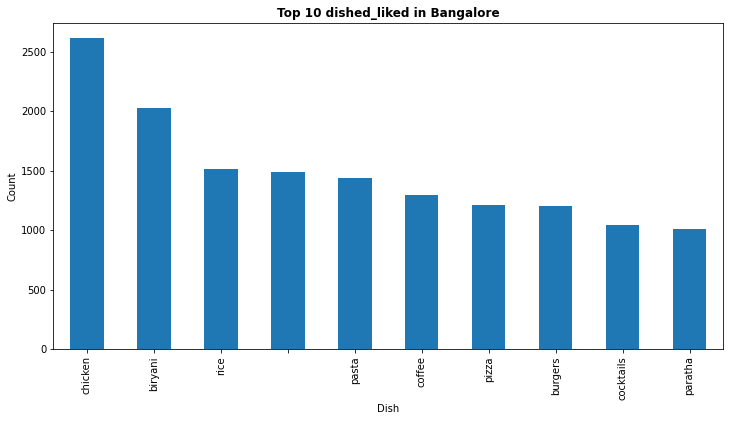

In [ ]:
plt.figure(figsize=(12,6)) 
pd.Series(dish_count).value_counts()[:10].plot(kind='bar')
plt.title('Top 10 dished_liked in Bangalore',weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

Observation
We can see that 'chicken' is most favourite dish followed by 'biryani' followed by 'rice'.

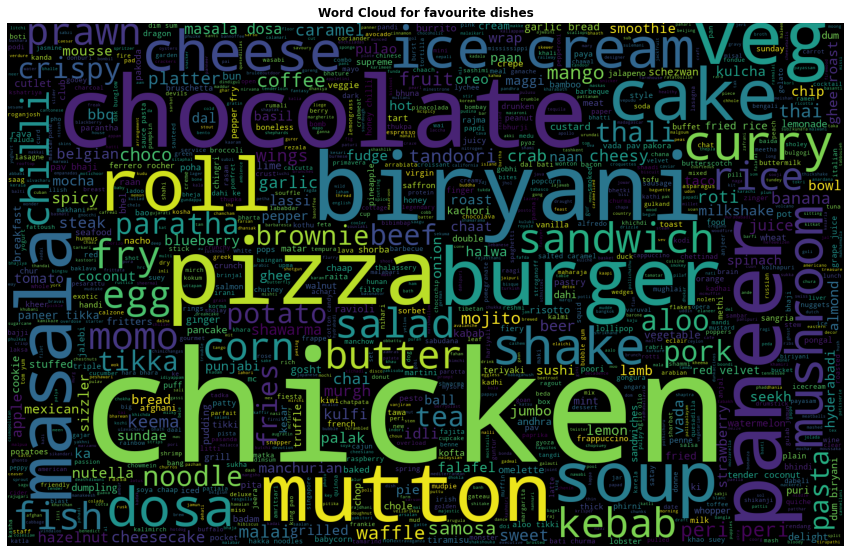

In [ ]:
dish_set = set(dish_count)
dish_word_cloud = ', '.join(dish_set)

plt.figure( figsize=(15,10) )
wc = WordCloud(width=1600, height=1000,background_color="black", max_words=len(dish_word_cloud))
wc.generate(dish_word_cloud)
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for favourite dishes',weight='bold')
plt.axis("off")
plt.imshow(wc)
plt.show()

Q.9) Lets see 'Rate' vs 'Restaurant type' graph.

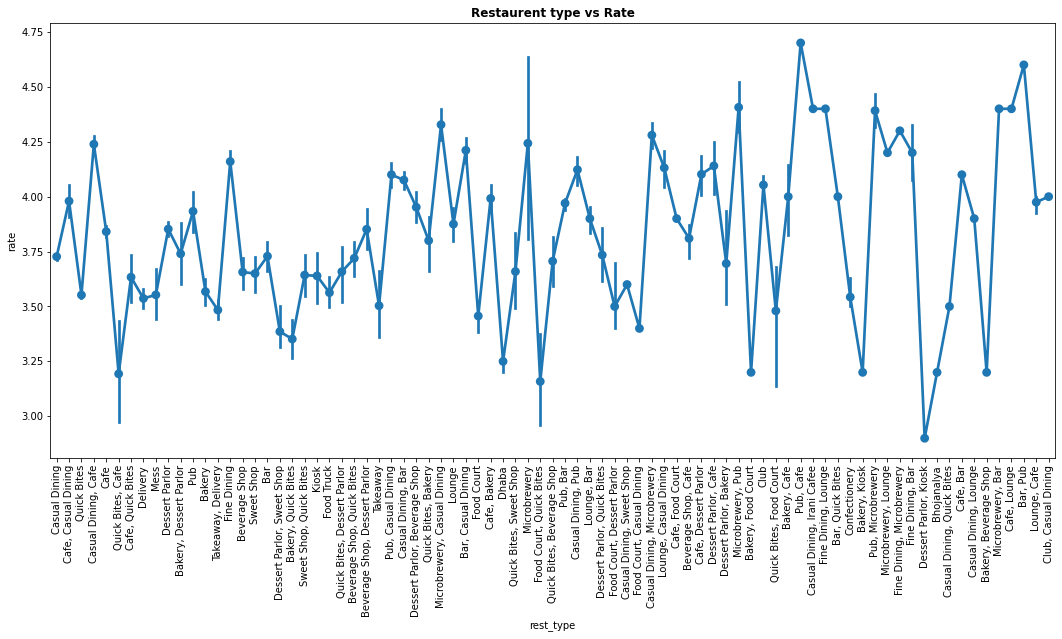

In [ ]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=df["rest_type"], y=df["rate"], data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()

Q.10) Print top 10 Cuisines

In [ ]:
cuisines_data = df[df.cuisines.notnull()]
cuisines_data.cuisines = cuisines_data.cuisines.apply(lambda x:x.lower().strip())

In [ ]:
cuisines_count= []

for i in cuisines_data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0, 0.5, 'No of restaurants')

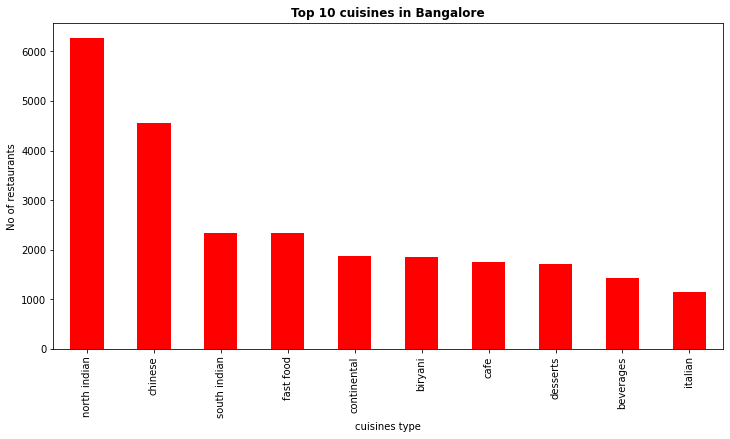

In [ ]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

Observation
North Indian food is at top, followed by chinease and so on.

In [ ]:
cuisines_set = set(cuisines_count)
cuisines_word_cloud = ', '.join(cuisines_set)

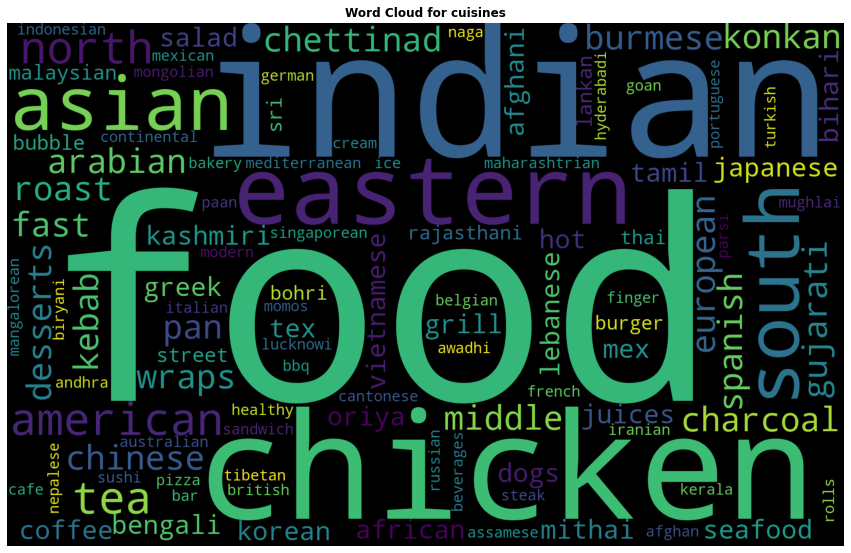

In [ ]:
plt.figure( figsize=(15,10) )
wc = WordCloud(width=1600, height=1000,background_color="black", max_words=len(cuisines_word_cloud))
wc.generate(cuisines_word_cloud)
plt.title('Word Cloud for cuisines',weight='bold')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.imshow(wc)
plt.show()

Q.11) Lets plot 'Rate' vs 'Online order'

Text(0.5, 1.0, 'rate vs oline order')

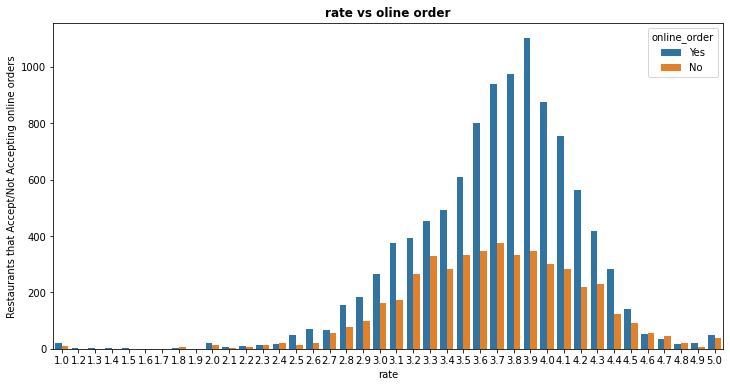

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x=df['rate'], hue = df['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rate vs oline order",weight = 'bold')

3. Model

Till now we were understanding, visualising data. Now let move to build proper Machine Learning model.

In [ ]:
# pd.get_dummies ==> Convert categorical variable into dummy/indicator variables.(OneHot encoding)

df['online_order']= pd.get_dummies(df.online_order, drop_first=True)
df['book_table']= pd.get_dummies(df.book_table, drop_first=True)
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type),process_text
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,a beautiful place to dine in the interiors tak...
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"momos, lunch buffet, chocolate nirvana, thai g...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,had been here for dinner with family turned o...
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","churros, cannelloni, minestrone soup, hot choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet,ambience is not that good enough and it's not ...
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,masala dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet,great food and proper karnataka style full mea...
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"panipuri, gol gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet,very good restaurant in neighbourhood buffet ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,Ruchis Point,1,0,3.8,75,Banashankari,Quick Bites,"sandwiches, noodles, sandwich","Fast Food, Chinese",200,"[(Rated 2.0, RATED\n paneer Manchurian had 6 ...","['Aloo Manchurian', 'Gobi Manchurian', 'Mushro...",Delivery,paneer manchurian had 6 pieces of paneer for 8...
19994,Funky Punjab,1,0,3.9,410,JP Nagar,Casual Dining,"lassi, chole, palak paneer, chaap, paneer tikk...","North Indian, Chinese",500,"[(Rated 4.0, RATED\n It's been 4 years we hav...","['Paneer Tikka', 'Gobi Manchurian', 'Paneer Ch...",Delivery,it's been 4 years we have been visiting this j...
19995,Mudpipe Cafe,1,1,4.5,1878,BTM,Cafe,"chaat, nachos, peri peri pizza, wedges, milk s...","Cafe, Continental, Burger",900,"[(Rated 4.0, RATED\n Amazing ambience. Good p...","['Crispy Spinach Corn Cheese Stick', 'Alfredo ...",Delivery,amazing ambience good place to spend some sob...
19996,Alif Restaurant,1,0,3.6,27,JP Nagar,Casual Dining,,"North Indian, Chinese",600,"[(Rated 3.0, RATED\n It's a medium size hotel...","['Pepper Chicken', 'Grilled Chicken', 'Dum Bri...",Delivery,it's a medium size hotel we ordered phulka an...


In [ ]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'average_cost', 'reviews_list',
       'menu_item', 'listed_in(type)', 'process_text'],
      dtype='object')

In [ ]:
# drop redudant columns
df.drop(columns=['dish_liked','reviews_list','menu_item','listed_in(type)','process_text'], inplace  =True)

In [ ]:
# removed ',' between two words; then converted to categorical features
df['rest_type'] = df['rest_type'].str.replace(',' , '') 
df['rest_type'] = df['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
df['rest_type'].value_counts().head()

Bites Quick       4911
Casual Dining     3545
Cafe              1185
Dessert Parlor     679
Delivery           614
Name: rest_type, dtype: int64

In [ ]:
# removed ',' between two words; then converted to categorical features

df['cuisines'] = df['cuisines'].str.replace(',' , '') 
df['cuisines'] = df['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
df['cuisines'].value_counts().head()

Chinese Indian North                 828
Indian North                         792
Indian South                         432
Chinese Indian Indian North South    393
Bakery Desserts                      308
Name: cuisines, dtype: int64

In [ ]:
# removed ',' between two words; then converted to string to int

df['average_cost'] = df['average_cost'].str.replace(',' , '') 
df['average_cost'] = df['average_cost'].apply(int)

In [ ]:
df.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,Chinese Indian Mughlai North,800
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,Chinese Indian North Thai,800
2,San Churro Cafe,1,0,3.8,918,Banashankari,Cafe Casual Dining,Cafe Italian Mexican,800


In [ ]:
# build x & y dataset
x = df.drop(['rate','name'],axis = 1)
y = df['rate']

3.1 Splitting the data for Model Building¶

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

In [ ]:
# save to local disk
dump(X_train, '/content/drive/MyDrive/Restaurant Rating Prediction/pkl_files/more_feature_X_train')
dump(X_test, '/content/drive/MyDrive/Restaurant Rating Prediction/pkl_files/more_feature_X_test')
dump(y_train, '/content/drive/MyDrive/Restaurant Rating Prediction/pkl_files/more_feature_y_train')
dump(y_test, '/content/drive/MyDrive/Restaurant Rating Prediction/pkl_files/more_feature_y_test')

['/content/drive/MyDrive/Restaurant Rating Prediction/pkl_files/more_feature_y_test']

In [ ]:
X_train = load('/content/drive/MyDrive/Restaurant Rating Prediction/pkl_files/more_feature_X_train')
X_test = load('/content/drive/MyDrive/Restaurant Rating Prediction/pkl_files/more_feature_X_test')
y_train = load('/content/drive/MyDrive/Restaurant Rating Prediction/pkl_files/more_feature_y_train')
y_test = load('/content/drive/MyDrive/Restaurant Rating Prediction/pkl_files/more_feature_y_test')

In [ ]:
X_train.head(2)

,online_order,book_table,votes,location,rest_type,cuisines,average_cost
17192,1,0,164,HSR,Bites Quick,Arabian BBQ Lebanese Rolls,500
6749,0,0,450,Whitefield,Casual Dining,Indian North,1800


In [ ]:
enc = OneHotEncoder( handle_unknown='ignore')

In [ ]:
## ALWAYS AVOID DATA LEAKAGE

# this method is for training data set
def one_hot_fit_transform(df,name):
    output_data = df[name].values.reshape(-1, 1)
    return enc.fit_transform(output_data).toarray()

# this method is for test data set
def one_hot_transform(df,name):
    output_data1 = df[name].values.reshape(-1, 1)
    return enc.transform(output_data1).toarray()

In [ ]:
# one hot encoding apply to 'rest_type' features on train/test dataset
tr_dummy_rest_type = one_hot_fit_transform(X_train,'rest_type' )
te_dummy_rest_type= one_hot_transform(X_test,'rest_type' )

# one hot encoding apply to 'location' features on train/test dataset
tr_dummy_city = one_hot_fit_transform(X_train,'location' )
te_dummy_city= one_hot_transform(X_test,'location')

# one hot encoding apply to 'cuisines' features on train/test dataset
tr_dummy_cuisines = one_hot_fit_transform(X_train,'cuisines' )
te_dummy_cuisines=one_hot_transform(X_test,'cuisines')

In [ ]:
tr_dummy_rest_type.shape, te_dummy_rest_type.shape

((10465, 64), (4485, 64))

In [ ]:
tr_dummy_city.shape, te_dummy_city.shape

((10465, 71), (4485, 71))

In [ ]:
tr_dummy_cuisines.shape, te_dummy_cuisines.shape

((10465, 1317), (4485, 1317))

In [ ]:
## combine all 'one-hot' encoded features as Tr.
tr =pd.DataFrame(pd.np.column_stack([ tr_dummy_rest_type,tr_dummy_city, tr_dummy_cuisines]))

## CONCAT both dataframe ### ie Tr and X_train(original dataframe)
## https://stackoverflow.com/questions/45963799/pandas-concat-resulting-in-nan-rows

l1=X_train.values.tolist()
l2=tr.values.tolist()

for i in range(len(l1)):
    l1[i].extend(l2[i])

X_train=pd.DataFrame(l1,columns=X_train.columns.tolist()+tr.columns.tolist())
X_train.shape

(10465, 1459)

In [ ]:
## combine all 'one-hot' encoded features as Te.
te =pd.DataFrame(pd.np.column_stack([ te_dummy_rest_type,te_dummy_city,te_dummy_cuisines]))

## CONCAT both dataframe ### ie Te and X_test(original dataframe)
## https://stackoverflow.com/questions/45963799/pandas-concat-resulting-in-nan-rows

l3=X_test.values.tolist()
l4=te.values.tolist()
for i in range(len(l3)):
    l3[i].extend(l4[i])

X_test=pd.DataFrame(l3,columns=X_test.columns.tolist()+te.columns.tolist())
X_test.shape

(4485, 1459)

In [ ]:
# after onehot encoding DONE. 'location','rest_type','cuisines' are redundant features. REMOVE them.

X_train =X_train.drop(['location','rest_type','cuisines'],axis = 1)
X_test =X_test.drop(['location','rest_type','cuisines'],axis = 1)

In [ ]:
X_train.head(3)

,online_order,book_table,votes,average_cost,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451
0,1,0,164,500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,450,1800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,98,700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now it is looking good. We can proceed.

In [ ]:
print(x.shape)
print(y.shape)

(14950, 7)
(14950,)


In [ ]:
# checking final train set shape
X_train.shape, y_train.shape

((10465, 1456), (10465,))

In [ ]:
# checking final test set shape
X_test.shape, y_test.shape

((4485, 1456), (4485,))

In [ ]:
dump(X_train, '/content/drive/MyDrive/Restaurant Rating Prediction/max_features_pkl/more_feature_X_train')
dump(X_test, '/content/drive/MyDrive/Restaurant Rating Prediction/max_features_pkl/more_feature_X_test')
dump(y_train, '/content/drive/MyDrive/Restaurant Rating Prediction/max_features_pkl/more_feature_y_train')
dump(y_test, '/content/drive/MyDrive/Restaurant Rating Prediction/max_features_pkl/more_feature_y_test')

['/content/drive/MyDrive/Restaurant Rating Prediction/max_features_pkl/more_feature_y_test']

In [ ]:
X_train= load('/content/drive/MyDrive/Restaurant Rating Prediction/max_features_pkl/more_feature_X_train') 
X_test= load('/content/drive/MyDrive/Restaurant Rating Prediction/max_features_pkl/more_feature_X_test')
y_train= load('/content/drive/MyDrive/Restaurant Rating Prediction/max_features_pkl/more_feature_y_train')
y_test= load('/content/drive/MyDrive/Restaurant Rating Prediction/max_features_pkl/more_feature_y_test')

In [ ]:
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


def mse(y, y_pred):
    return np.mean((y_pred - y)**2) 

mse_scorer = make_scorer(mse, greater_is_better=False)

3.2. Building a Random model (Finding worst-case MSE)

In [ ]:
import random

rand_pred= np.zeros(y_test.shape[0])
for i in range(y_test.shape[0]):
    rand_probs = round(random.uniform(1.0, 5.0),2)
    rand_pred[i] = rand_probs

mse(y_test, rand_pred)

1.9932572352285396

Here we can see that random model provide 2.12 MSE value. We can take this as a cut off. Any model which has MSE less than random model is considered as better model.

Model -1 Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

mse(y_test, y_pred_lr)

543552961859.04236

Model - 2 SGD Regressor


In [ ]:
from sklearn import linear_model

sgdReg = linear_model.SGDRegressor()
sgdReg.fit(X_train,y_train)
y_pred_sgdr = sgdReg.predict(X_test)

mse(y_test, y_pred_sgdr)

6.9631021905893445e+28

Model - 3 GBDT Regressor

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_jobs=-1, eval_metric='rmse', random_state=1,verbose_eval=10)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

mse(y_test, y_pred_xgb)

[00:17:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.14245977214655267

Model -4 Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

mse(y_test, y_pred_rfr)

0.06524927626131394

Without any hyper param tuning RFR ie Random Forest Regressor it learning something. so let experiment on RFR.


Hyperparam Tuning on RFR

In [ ]:
tuned_parameters = {'n_estimators': [200 , 250,500]}

grd_regressor = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, 
                   n_jobs=-1, verbose=1, scoring=mse_scorer)
grd_regressor.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 22.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

After above experiment we got below result

MSE: 0.0636878671762552 == 200 (n_estimators)
MSE: 0.06462830478425878 ==250 (n_estimators)
MSE: 0.064247201697659674 == 500 (n_estimators)

We can clearly see that MSE values is dropping but fact is to run 1200 estimators it take more than 4.5 hours on my system(i5 7Gen, 16GB RAM), to run 1000 n_estimators is took almost 3 hours.

So we can reduce MSE value further but training time is increases accordingly so I decide to stop on this experiments.

Final n_estimators choose 200.

Best Parameter Model

In [ ]:
rfr = RandomForestRegressor(max_depth=None,n_estimators=200,min_samples_split= 2)
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

mse(y_test, y_pred_rfr)

0.0636878671762552

In [ ]:
rfr = RandomForestRegressor(max_depth=None,n_estimators=250,min_samples_split= 2)
rfr.fit(X_train,y_train)
y_pred_rfr1 = rfr.predict(X_test)

mse(y_test, y_pred_rfr1)

0.06462830478425878

In [ ]:
rfr = RandomForestRegressor(max_depth=None,n_estimators=500,min_samples_split= 2)
rfr.fit(X_train,y_train)
y_pred_rfr2 = rfr.predict(X_test)

mse(y_test, y_pred_rfr2)

0.06424720169765967

Let's Visualise output by comparing y_true vs y_pred n = 200

In [ ]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })
Randpred

,actual,pred
16201,4.2,4.212500
14343,4.5,3.436000
13454,4.1,4.094000
7417,3.2,3.276000
10896,4.2,4.193000
...,...,...
15367,4.3,4.300000
10202,4.2,4.038500
9771,3.0,3.078000
1757,3.6,3.524531


MSE = 0.06368 , It is good Model still can we still improved Model?
Not Null Features only
Till now, we have considered ONE-HOT encoding of on below features.

rest_type
location
cuisines
online_order
book_table
Here we are going to include below features also,

dish_liked
cuisines
Obviously we have to deal with large features set.

In [ ]:
from prettytable import PrettyTable


x = PrettyTable()
x.field_names =  ['Model','MSE']

x.add_row([" Random Model", 1.993])
x.add_row(["Linear Regression ", 543552961859.0423])
x.add_row(["SGD Regressor ", 6.963])
x.add_row(["GBDT Regressor ", 0.142])
x.add_row(["Random Forest Regressor", 0.0652])
x.add_row(["Hyperparam Tuning on Random Forest Regressor", 0.063])





print('\n')
print(x)



+----------------------------------------------+-------------------+
|                    Model                     |        MSE        |
+----------------------------------------------+-------------------+
|                 Random Model                 |       1.993       |
|              Linear Regression               | 543552961859.0423 |
|                SGD Regressor                 |       6.963       |
|               GBDT Regressor                 |       0.142       |
|           Random Forest Regressor            |       0.0652      |
| Hyperparam Tuning on Random Forest Regressor |       0.063       |
+----------------------------------------------+-------------------+


Here we can conclude that **Hyperparam Tuning on Random Forest Regressor** is best model with lowest **MSE = 0.063**


